In [1]:
import numpy as np
from matplotlib.pyplot import *


from skimage.data import *

img_name = 'lenna.jpg'

IMAGE_DIR = "../data/imgs/" + img_name

In [3]:
image = imread (IMAGE_DIR)

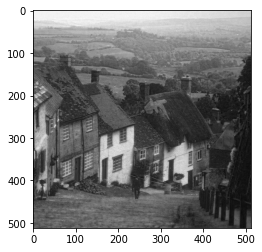

In [2]:
image = imread ('../data/imgs/houses.jpg')

# imshow (image)

image_x = image.T [0]
image_y = image.T [1]
image_z = image.T [2]

imshow (image := image_z.T, cmap = "gray")

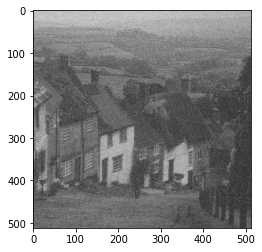

In [20]:
def gnoise (image, sigma = 25) :
    return image + np.random.normal (0,sigma, np.shape (image))


imshow (gnoise (image, 25), cmap = 'gray')

In [21]:
def neumann_bc (image, border_size = 10) :
    d = border_size
    a, b = np.shape (image)[0], np.shape (image)[1]
        
    A = a + 2 * d
    B = b + 2 * d
    
    I = np.zeros ((A,B))
    
    I [d:(A-d) , d:(B-d)] = image
    
    for i in range (d,A-d) :
        for j in range (0,d) :
            I [i,j] = I [i, 2 * d - j]
            
        for j in range (0,d) :
            I [i,j+B-d] = I [i, B-d-1 - j]
    
    for j in range (0,B) :
        for i in range (0,d) :
            I [i,j] = I [2 * d - i, j]
            
        for i in range (0,d) :
            I [i+B-d,j] = I [B-d-1 - i, j]

    return I

In [22]:
def grad (P) :
    a, b = np.shape (P)[0], np.shape (P)[1]

    Dx = np.zeros ((a,b))
    Dy = np.zeros ((a,b))
    
    for i in range (a) :
        for j in range (b) :
            if i < a-1 :
                Dx [i,j] = P [i+1,j] - P [i,j]
            elif i == a-1 :
                Dx[i,j] = 0

            if j < b-1 :
                Dy [i,j] = P [i,j+1] - P [i,j]
            elif j == b-1 :
                Dy [i,j] = 0
            
    return Dx, Dy

def div (P) :
    a, b = np.shape (P)[1], np.shape (P)[2]

    Dx = np.zeros ((a,b))
    Dy = np.zeros ((a,b))

    
    for i in range (a) :
        for j in range (b) : 
            if 0 < i < a-1 :
                Dx [i,j] = P [0,i,j] - P [0,i-1,j]
            elif i == 0 :
                Dx [i,j] = P [0,i,j]
            elif i == a-1 :
                Dx [i,j] = - P [0,i-1,j]
                
            if 0 < j < a-1 :
                Dy [i,j] = P [1,i,j] - P [1,i,j-1]
            elif j == 0 :
                Dy [i,j] = P [1,i,j]
            elif j == b-1 :
                Dy [i,j] = - P [1,i,j-1]
                
    return Dx + Dy

In [23]:
def hessian (v) :
    a, b = np.shape (v)

    H11 = np.zeros ((a,b))
    H12 = np.zeros ((a,b))
    H21 = np.zeros ((a,b))
    H22 = np.zeros ((a,b))
    
    for i in range (a) :
        for j in range (b) :
            if 0 < i < a-1 :
                H11 [i,j] = v[i+1,j] - 2 * v[i,j] + v[i-1,j]
            elif i == 0 :
                H11 [i,j] = v[i+1,j] - v[i,j]
            elif i == a-1 :
                H11 [i,j] = v[i-1,j] - v[i,j]
    
            if 0 < i <= a-1 and 0 <= j < b-1 :
                H12 [i,j] = v[i,j+1] - v[i,j] + v[i-1,j+1] + v[i-1,j]
            elif i == 0 or i == a-1 :
                H12 [i,j] = 0
            
            if 0 <= i < a-1 and 0 < j <= b-1 :
                H21 [i,j] = v[i+1,j] - v[i,j] + v[i+1,j-1] + v[i,j-1]
            elif i == 0 or i == a-1 :
                H21 [i,j] = 0

            if 0 < j < b-1 :
                H22 [i,j] = v[i,j+1] - 2 * v[i,j] + v[i,j-1]
            elif j == 0 :
                H22 [i,j] = v[i,j+1] - v[i,j]                
            elif j == b-1 :
                H22 [i,j] = v[i,j-1] - v[i,j]
            
    return H11, H12, H21, H22

def hessian_s (p) :
    a, b = np.shape (p)[1], np.shape (p)[2]
    
    H11 = np.zeros ((a,b))
    H12 = np.zeros ((a,b))
    H21 = np.zeros ((a,b))
    H22 = np.zeros ((a,b))
    
    for i in range (a) :
        for j in range (b) :
            if 0 < i < a-1 :
                H11 [i,j] = p[0,i-1,j] - 2 * p[0,i,j] + p[0,i+1,j]
            elif i == 0 :
                H11 [i,j] = p[0,i+1,j] - p[0,i,j]
            elif i == b-1 :
                H11 [i,j] = p[0,i-1,j] - p[0,i,j]
            
            if 0 < j < b-1 :
                H22 [i,j] = p[3,i,j-1] - 2 * p[3,i,j] + p[3,i,j+1]
            elif j == 0 :
                H22 [i,j] = p[3,i,j+1] - p[3,i,j]
            elif j == b-1 :
                H22 [i,j] = p[3,i,j-1] - p[3,i,j]
            
            if 0 < j < b-1 :
                if 0 < i < a-1 :
                    H12 [i,j] = p[1,i,j-1] - p[1,i,j] - p[1,i+1,j-1] + p[1,i+1,j]
                elif i == 0 :
                    H12 [i,j] = p[1,i+1,j] - p[1,i+1,j-1]
                elif i == a-1 :
                    H12 [i,j] = p[1,i,j-1] - p[1,i,j]
            if 0 < i < a-1 :
                if j == 0 :
                    H12 [i,j] = p[1,i+1,j] - p[1,i,j]
                elif j == b-1 :
                    H12 [i,j] = p[1,i,j-1] - p[1,i+1,j-1] 
            if i == 0 :
                if j == 0 :
                    H12 [i,j] = p[1,i+1,j]
                elif j == b-1 :
                    H12 [i,j] = - p[1,i+1,j-1]
            if i == a-1 :
                if j == 0 :
                    H12 [i,j] = - p[1,i,j]
                elif j == b-1 :
                    H12 [i,j] = - p[1,i,j-1]
            
            if 0 < j < b-1 :
                if 0 < i < a-1 :
                    H21 [i,j] = p[2,i-1,j] - p[2,i,j] - p[2,i-1,j+1] + p[2,i,j+1]
                elif i == 0 :
                    H21 [i,j] = p[2,i,j+1] - p[2,i,j]
                elif i == a-1 :
                    H21 [i,j] = p[2,i-1,j] - p[2,i-1,j+1]

            if 0 < i < a-1 :
                if j == 0 :
                    H21 [i,j] = p[2,i,j+1] - p[2,i-1,j+1]
                elif j == b-1 :
                    H21 [i,j] = p[2,i-1,j] - p[2,i,j]
            
            if i == 0 :
                if j == 0 :
                    H21 [i,j] = p[2,i,j+1]
                elif j == b-1 :
                    H21 [i,j] = - p[2,i,j]
                
            if i == a-1 :
                if j == 0 :
                    H21 [i,j] = - p[2,i-1,j+1]
                elif j == b-1 :
                    H21 [i,j] = p[2,i-1,j]

    return H11 + H12 + H22 + H21

In [24]:
def norm (u) :
    return np.sqrt (sum(np.power (u,2)))

def PSNR (ud, u) :
    '''Peak Signal to Noise Ratio'''
    return 20 * np.log10 (np.divide (255, np.absolute (norm(ud-u))))
    
def SNR (ud, u) :
    '''Signal to Noise Ratio'''
    return 20 * np.log10 (np.divide (norm(u), norm(ud-u)))

In [30]:
def chambolle1 (g, L = 20, max_iter = 200, tau = 1/4, eps = 1/100) :
        
    p = np.zeros (np.shape ((g,g)))
    
    for i in range (max_iter) :        

        gd = grad (div(p) - np.divide (g,L))
        
        norm_gd = np.sqrt (sum(np.power (gd,2)))
        
        new_p = np.divide (p + np.dot (tau,gd) , 1 + tau*norm_gd)
        
        if (x := np.max (np.abs (new_p - p))) < eps :
            pass
        
        p = new_p
        
        if not i % 10 :
            print (f'{i}\t{x}')
    return g - L * div (p)

In [31]:
def chambolle2 (g, L = 50, max_iter = 100, tau = 1/4, eps = 1/100) :
        
    p = np.zeros (np.shape ((g,g,g,g)))
    for i in range (max_iter) :

        gd =  hessian(hessian_s(p) - np.divide (g,L))
        
        norm_gd = np.sqrt (sum(np.power (gd,2)))
        
        new_p = np.divide (p - np.dot (tau,gd) , 1 + tau*norm_gd)
        
        if np.max (np.abs (new_p - p)) < eps :
            break
                
        p = new_p
        
        if not i % 10 :
            print (f'iter {i}')
    return g - L * hessian_s (p)

In [32]:
import time

I = gnoise (image, sigma := 25)

start = time.time()

DI = chambolle1 (g = I)

elapsed = time.time()
elapsed = elapsed - start
print ("Time spent is: ", elapsed)

0	0.708651720514831
10	0.05227487781332596
20	0.024974084906083993
30	0.016577757742189975
40	0.012839928903395609
50	0.010126656095717501
60	0.008630260039931226
70	0.007410226153145794
80	0.006328598916957917
90	0.005454678226852416
100	0.005013099229278423
110	0.004643710513277638
120	0.004428463755077355
130	0.004215127524982491
140	0.004006141144249138
150	0.003802641849484395
160	0.0036054320945776014
170	0.0034153505389054872
180	0.003233122970596858
190	0.0030592798560022394
Time spent is:  144.343736410141


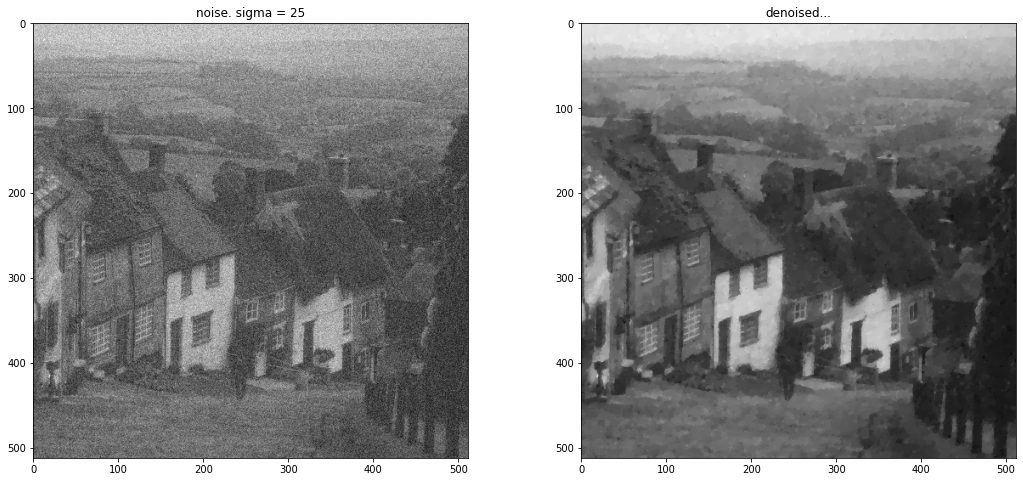

In [33]:
fig = figure(figsize=(18,8))

ax = fig.add_subplot(1, 2, 1)
imshow(I, cmap = 'gray')
ax.set_title(f'noise. sigma = {sigma}')

ax = fig.add_subplot(1, 2, 2)
ax.set_title('denoised...')
imshow(DI, cmap = 'gray')